# Perceptron from scratch

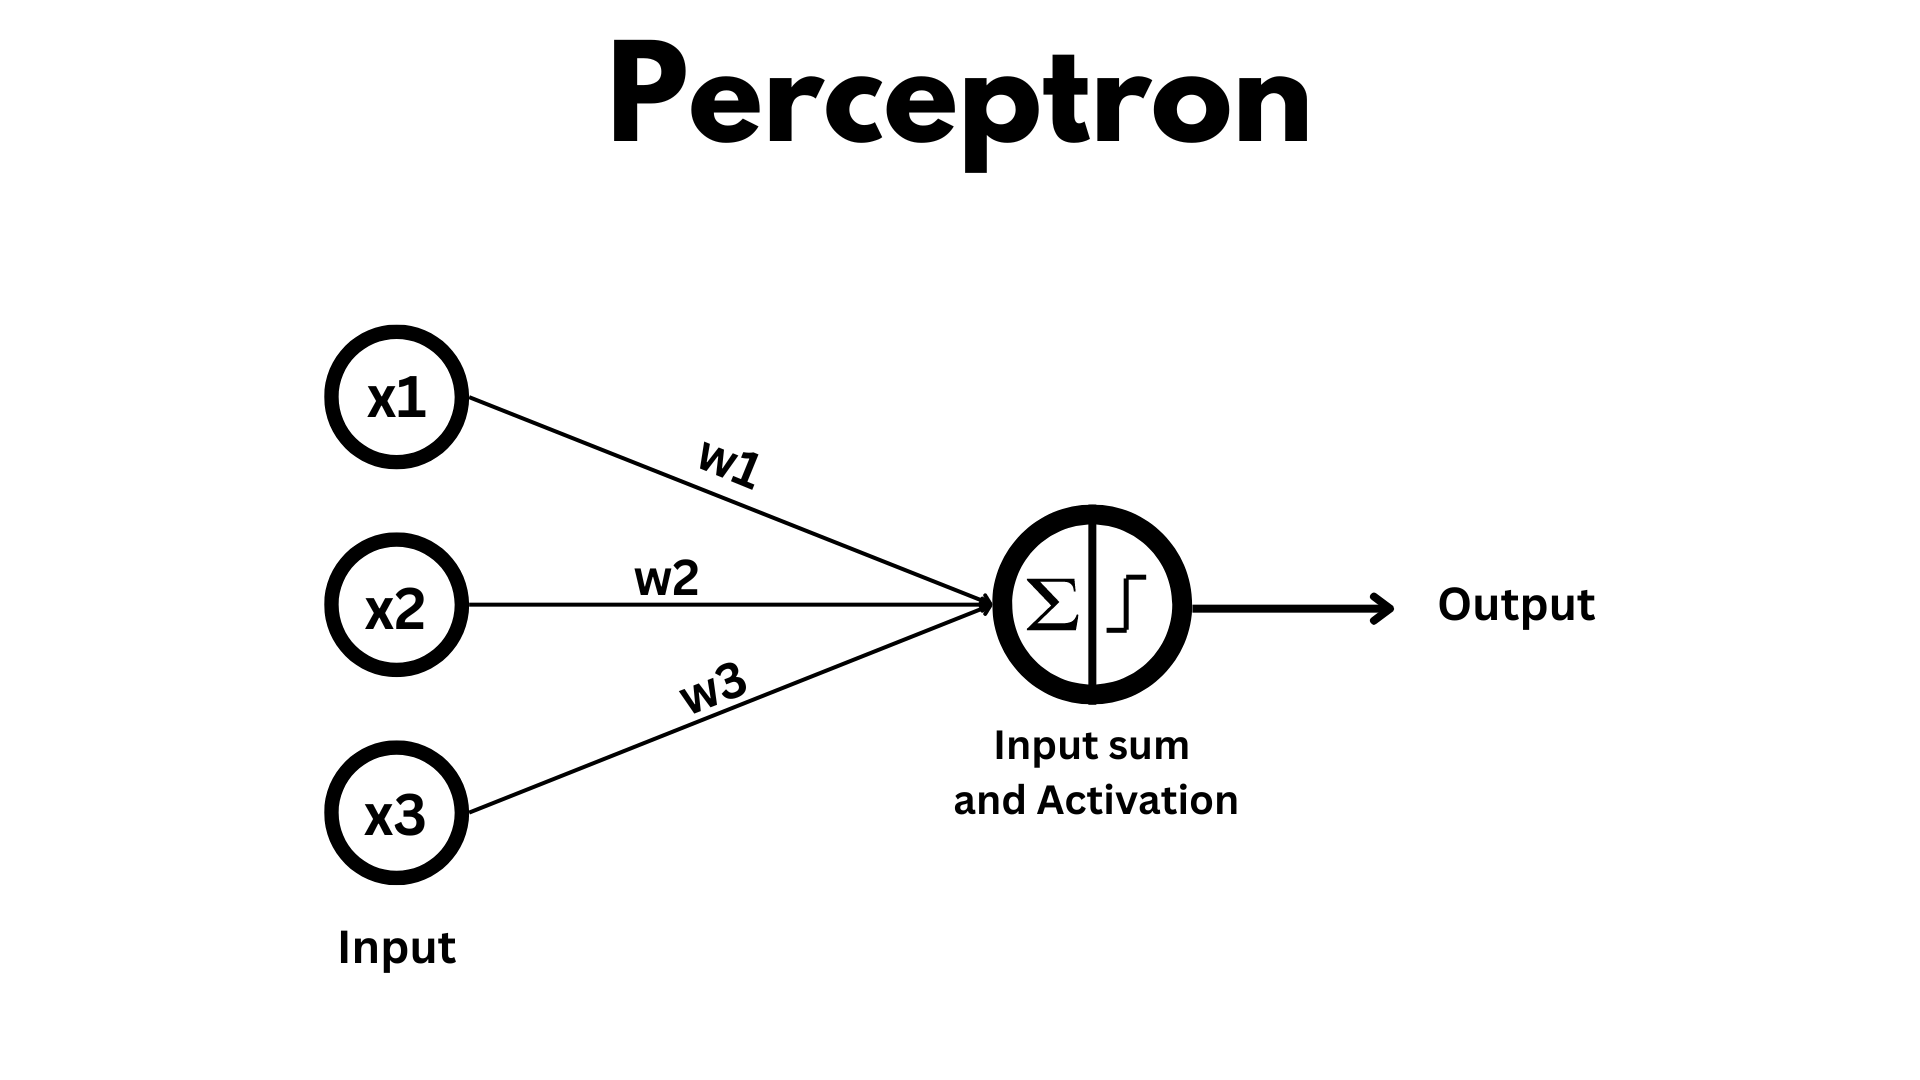

*   Perceptron is a single unit of logic in an Artificial neural network.
*   It is an algorithm which outputs a binary conclusion.
*   Can also be defined as a single node in a bigger network, meant to mimic a neuron inside a human brain.
*   Perceptrons can learn only linearly separable patterns.

Steps involved in building a Perceptron:

We can write the equation for a linear model as:

\begin{align}
f(x) = wx + b
\end{align}

Here, the activation function will be a sigmoid function which maps any real value number to a probability between 0 and 1.

we can now approximate it as:

\begin{align}
\hat{y} = \frac{1}{1 + e^{-f(x)}}
\end{align}

For each training sample, the update rule for weights and bias is given as:

\begin{align}
w = w + Δw
\end{align}
\begin{align}
b = b + Δb
\end{align}

And Δw and Δb will be given as:
\begin{align}
Δw = α (y_{i} - \hat{y}_{i}) x_{i}
\end{align}

\begin{align}
Δb = α (y_{i} - \hat{y}_{i}) 
\end{align}

In [1]:
import numpy as np

In [2]:
class Perceptron:

  def __init__(self, learning_rate = 0.1, n_iters = 1000):
    self.lr = learning_rate
    self.epochs = n_iters
    self.weights = None
    self.bias = None
  
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def fit(self, X, y):
    self.weights = np.random.rand(X.shape[1]) * 0.01
    self.bias = 0
    
    # Implementing the linear equation
    for _ in range(self.epochs):
      for index, x_i in enumerate(X):
        linear_eq = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_eq)

        # Updating the weights and bias
        self.weights += self.lr * (y[index] - y_predicted) * x_i
        self.bias += self.lr * (y[index] - y_predicted)

  def predict(self, X):
    linear_eq = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_eq)
    return y_predicted

In [3]:
# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    from matplotlib import pyplot as plt

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == np.round(y_pred)) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    model = Perceptron(learning_rate=0.01, n_iters=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 1.0
